# HW1: Data visualization (Due by Apr 14 11:59pm)

This homework addresses data visualization and data manipulation.

Before you submit this Jupyter Notebook (.ipynb file) to Gradescope, **please restart your kernel and run all.** You do not need to submit a pdf file or .py file.

In [22]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Part 1: Combine multiple DataFrame objects to a large dataframe ( 5 pts )

Given the following temperature datasets, combine them to a large dataframe using `pandas.concat` command

- temperature data: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/1901-1910.csv

- temperature data: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/2011-2020.csv

In [23]:
df1 = pd.read_csv('https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/1901-1910.csv')
df2 = pd.read_csv('https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/2011-2020.csv')

df1.head()
df2.head()

df = pd.concat([df1, df2])

#concat allows us to merge the dataframes along columns.

df


,ID,Year,VALUE1,VALUE2,VALUE3,VALUE4,VALUE5,VALUE6,VALUE7,VALUE8,VALUE9,VALUE10,VALUE11,VALUE12
0,AG000060390,1901,1034.0,844.0,1164.0,1534.0,1564.0,2354.0,2444.0,2364.0,2214.0,1604.0,1364.0,1004.0
1,AG000060390,1902,984.0,1194.0,1254.0,1544.0,1514.0,1984.0,2484.0,2574.0,2164.0,1694.0,1494.0,1134.0
2,AG000060390,1903,1144.0,1064.0,1266.0,1346.0,1646.0,1906.0,2326.0,2446.0,2146.0,1926.0,1356.0,1056.0
3,AG000060390,1904,926.0,1126.0,1136.0,1406.0,1836.0,2126.0,2516.0,2606.0,2076.0,1826.0,1376.0,1246.0
4,AG000060390,1905,906.0,866.0,1386.0,1576.0,1596.0,2146.0,2326.0,2496.0,2206.0,1716.0,1386.0,1076.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139753,ZI000067983,2012,2186.0,NaN,2157.0,1833.0,1835.0,1625.0,1563.0,NaN,2034.0,NaN,2298.0,2199.0
139754,ZI000067983,2013,NaN,2163.0,2054.0,1870.0,1729.0,1686.0,1528.0,1862.0,2100.0,1967.0,2258.0,2142.0
139755,ZI000067983,2014,NaN,2187.0,NaN,NaN,NaN,NaN,NaN,NaN,2087.0,2110.0,2297.0,NaN
139756,ZI000067983,2015,2175.0,2251.0,2083.0,1952.0,1880.0,1670.0,1650.0,1810.0,2010.0,2290.0,2230.0,2405.0


## Part 2: Create dataframe (5 pts)

In this part, you should create a new dataframe based on the following two csv files and the dafaframe you create from part 1:


- FIPS code: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/fips-10-4-to-iso-country-codes.csv

- station_metadata: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/station-metadata.csv


Create a new dataframe which includes the following columns: the ID number of the station, the year of the measurement, the temperature measurements (Jan - Dec in degrees C), country name, Lattitude, Longitude, station name (NAME column in station_metadata.csv).


**You will receive full credits if your dataframe contains all required columns. Column names and orders can be different.**

In [24]:
import pandas as pd
import numpy as np
countries_url = 'https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/fips-10-4-to-iso-country-codes.csv'
countriesdf = pd.read_csv(countries_url)

station_url = 'https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/station-metadata.csv'
stations = pd.read_csv(station_url)

df["FIPS 10-4"] = df["ID"].str[0:2]
df = pd.merge(df, countriesdf, on = ['FIPS 10-4'])
df = df.merge(stations, on='ID', how='left')
df = df.set_index(keys = ['ID', 'Year', 'Name', 'LATITUDE', 'LONGITUDE', 'NAME'])
df = df.drop(["FIPS 10-4", "ISO 3166", 'STNELEV'], axis = 1)
df = df.stack().reset_index()
df = df.rename(columns = {'level_6': 'Month', 0: 'Temperature (C)', 'NAME' : 'Station Name'})
df['Month'] = df['Month'].str[5:].astype(int)
df['Temperature'] = df['Temperature (C)'] / 100
df




,ID,Year,Name,LATITUDE,LONGITUDE,Station Name,Month,Temperature (C),Temperature
0,AG000060390,1901,Algeria,36.7167,3.250,ALGER_DAR_EL_BEIDA,1,1034.0,10.34
1,AG000060390,1901,Algeria,36.7167,3.250,ALGER_DAR_EL_BEIDA,2,844.0,8.44
2,AG000060390,1901,Algeria,36.7167,3.250,ALGER_DAR_EL_BEIDA,3,1164.0,11.64
3,AG000060390,1901,Algeria,36.7167,3.250,ALGER_DAR_EL_BEIDA,4,1534.0,15.34
4,AG000060390,1901,Algeria,36.7167,3.250,ALGER_DAR_EL_BEIDA,5,1564.0,15.64
...,...,...,...,...,...,...,...,...,...
1899682,ZAM00067663,2012,Zambia,-14.4500,28.467,KABWE_MILLIKEN,4,1970.0,19.70
1899683,ZAM00067663,2012,Zambia,-14.4500,28.467,KABWE_MILLIKEN,5,1850.0,18.50
1899684,ZAM00067663,2012,Zambia,-14.4500,28.467,KABWE_MILLIKEN,6,1750.0,17.50
1899685,ZAM00067663,2015,Zambia,-14.4500,28.467,KABWE_MILLIKEN,12,2485.0,24.85


## Part 3: Write a query function (10 pts)

Write a function called `query_climate()` which accepts five arguments:

`df`, the file name for the dataframe

`country`, a string giving the name of a country for which data should be returned.

`year_begin` and `year_end`, two integers giving the earliest and latest years for which should be returned.

`month`, an integer giving the month of the year for which should be returned.

The return value of `query_climate()` is a Pandas dataframe of temperature readings for the specified country, in the specified date range, in the specified month of the year. This dataframe should have the following columns, **in this order**:

`NAME`: The station name.

`LATITUDE`: The latitude of the station.

`LONGITUDE`: The longitude of the station.

`Country`: The name of the country in which the station is located.

`Year`: The year in which the reading was taken.

`Month`: The month in which the reading was taken.

`Temp`: The temperature at the specified station during the specified year and month. 


**Grading is based on unseen test examples. A test example is given below.**

In [25]:
def query_climate(df, country, year_begin, year_end, month):
    """
    Filters a dataframe based on the specified country, date range, and month.

    Parameters:
    - df (pandas.DataFrame): The input dataframe containing climate data.
    - country (str): The name of the country to filter by.
    - year_begin (int): The starting year of the date range.
    - year_end (int): The ending year of the date range.
    - month (int): The month to filter by.

    Returns:
    - filtered_df (pandas.DataFrame): The filtered dataframe containing the selected columns.

    Example:
    query_climate(df, "India", 1901, 2020, 1)
    """
    
    # Filter the dataframe based on the specified country and date range
    filtered_df = df[(df['Name'] == country) & (df['Year'] >= year_begin) & (df['Year'] <= year_end) & (df['Month'] == month)]
    
    # Select the desired columns and rename them
    filtered_df = filtered_df[['Station Name', 'LATITUDE', 'LONGITUDE', 'Name', 'Year', 'Month', 'Temperature']]
    filtered_df.columns = ['NAME', 'LATITUDE', 'LONGITUDE', 'Country', 'Year', 'Month', 'Temp']
    
    return filtered_df





Run this example and check if you get the correct result, your obtained dataframe looks like:

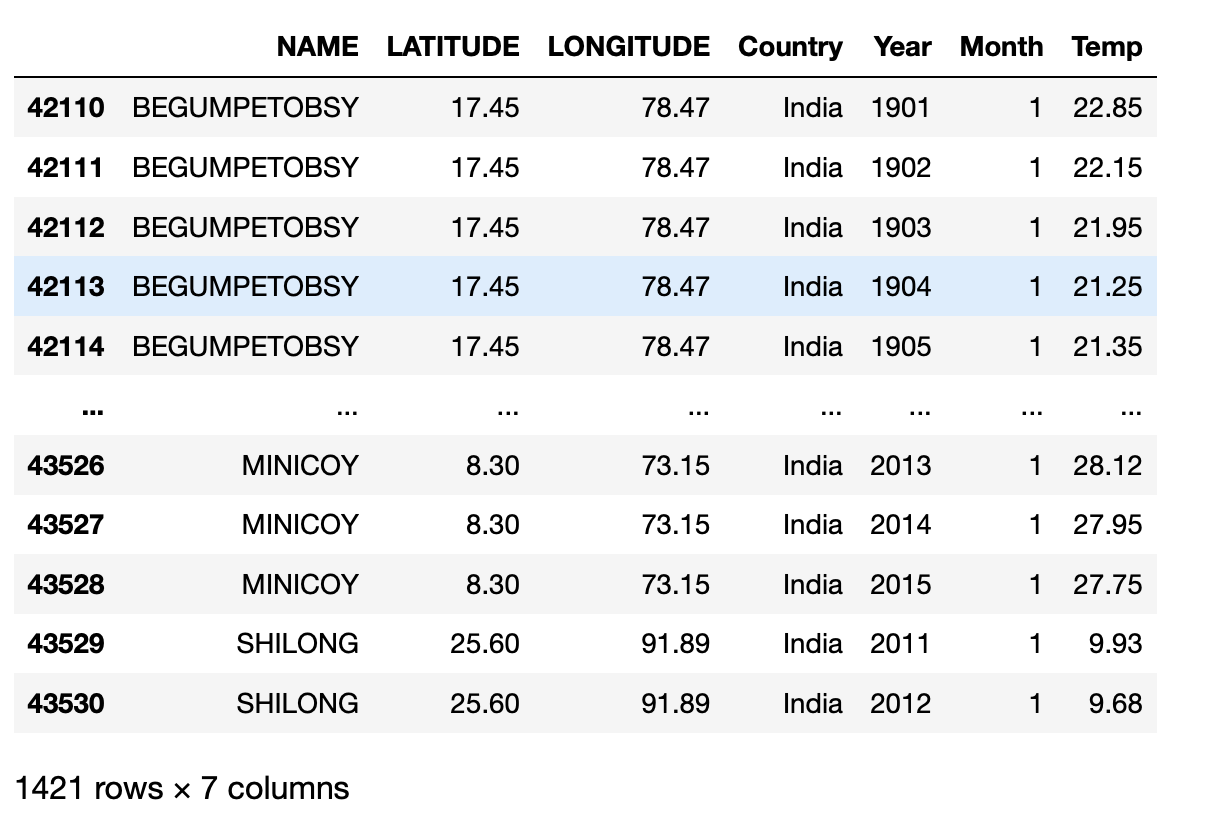

In [26]:
# the passing dataframe 'df' below is the dataframe you create in part 2
query_climate(df = df, country = "India", year_begin = 1901, year_end = 2020, month = 1)


,NAME,LATITUDE,LONGITUDE,Country,Year,Month,Temp
442659,BEGUMPETOBSY,17.45,78.47,India,1901,1,22.85
442671,BEGUMPETOBSY,17.45,78.47,India,1902,1,22.15
442683,BEGUMPETOBSY,17.45,78.47,India,1903,1,21.95
442695,BEGUMPETOBSY,17.45,78.47,India,1904,1,21.25
442707,BEGUMPETOBSY,17.45,78.47,India,1905,1,21.35
...,...,...,...,...,...,...,...
458436,SILCHAR,24.82,92.83,India,2015,1,20.65
458440,TRIVANDRUM,8.50,77.00,India,2015,1,27.50
458444,ALLAHABAD_BAMHRAULI,25.50,81.90,India,2013,1,15.30
458454,SHILONG,25.60,91.89,India,2011,1,9.93


## Part 4: Global warming ( 10 pts )

In this part, the goal is to create a bar plot which is used to compare average temperatures of decadeds 1901-1910 and 2011-2020.

The bar plot looks like the following:

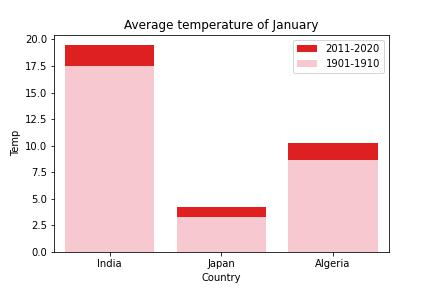

In above plot, I select three different countries and compute the average temperatures of year range 1901-1910 and 2011-2020 in January. Then, I use (two) barplot(s) to visualize the average temperature. 

**You should do more than my sample plot:**

Select 4 different countries and 6 different months, then compute two average temperatures for each country in each certain month. Then visualize 6 different plots (included in a single plot using `subplot` command). Please add necessary labels, titles, and legends to make your plot clear.

You should write a function or class to simplify your code if necessary.

What is your conclusion?

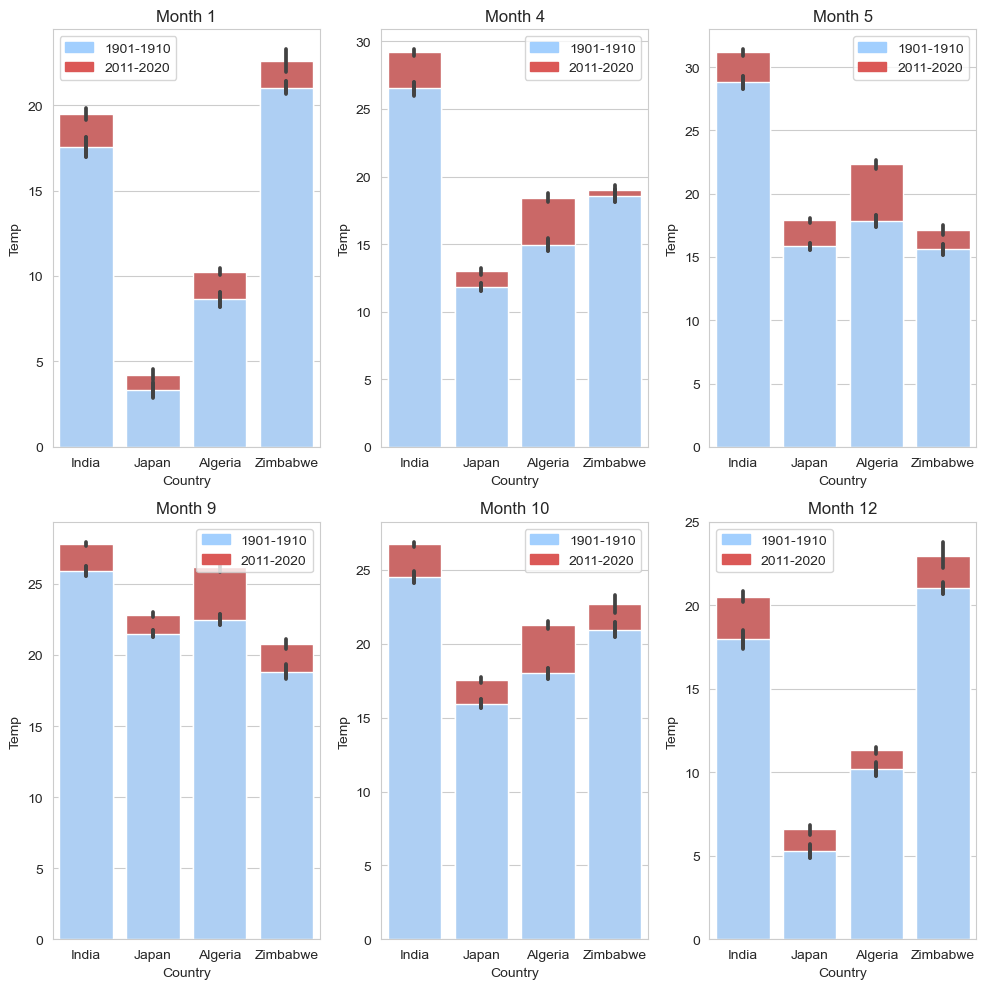

In [27]:
import seaborn as sns
import matplotlib.patches as mpatches
sns.set_style("whitegrid")

def plot_average_temperatures(countries, months):
    """
    Plots the average temperatures for the given countries and creates a barplot for each months.
    
    Parameters:
    - countries (list): A list of country names.
    - months (list): A list of month numbers.
    """
    
    fig, axes = plt.subplots(2, 3, figsize=(10, 5*2))
    axes = axes.flatten()
    for i, month in enumerate(months):
        data1 = pd.DataFrame()
        data2 = pd.DataFrame()
        for j, country in enumerate(countries):
            data1 = pd.concat([data1, query_climate(df, country, 1901, 1910, month)])
            data2 = pd.concat([data2, query_climate(df, country, 2011, 2020, month)])
        sns.barplot(x = 'Country', y = 'Temp', data = data1, color = '#a2cffe', ax=axes[i]).set_title(f'Month {month}')
        sns.barplot(x = 'Country', y = 'Temp', data = data2, color = '#db5856', ax=axes[i]).set_title(f'Month {month}')
        sns.barplot(x = 'Country', y = 'Temp', data = data1, color = '#a2cffe', ax=axes[i]).set_title(f'Month {month}')
        
        # Create custom patches
        patch1 = mpatches.Patch(color='#a2cffe', label='1901-1910')
        patch2 = mpatches.Patch(color='#db5856', label='2011-2020')
        
        # Add the patches to the legend
        axes[i].legend(handles=[patch1, patch2])
        
    plt.tight_layout()
    plt.show()

countries = ['India', 'Japan', 'Algeria', 'Zimbabwe']
months = [1, 4, 5, 9, 10, 12]
plot_average_temperatures(countries, months)


By looking at the pattern between each country's average temperature for decade 1901-1910 and 2011-2020 we see an apparent increase throughout all months.
This can be an apparent indicator of global warming as many advancements in technology have happened during this time but also the way we treat our enviornment has grown worse as we as a species have a lot more carbon emissions.

## Part 5: Plots (15 pts)

In this part, please create at least **three** complex and interesting interactive data visualizations using the dataframe created above. These plots must be of different types (e.g. scatter plot, line plot, histogram, bar plot, and etc) and are different from what you have created in Part 4. You are also welcome to create any plots which are not discussed in the lectures.

Alongside the plots, you should clearly describe (use markdown) what you do for each plot and state your conclusions.

Requirement: You should use seaborn.

**Grading is based on the plots and your description. Your explanation should match your plot.**

In [28]:
#importing the rest of the decades.

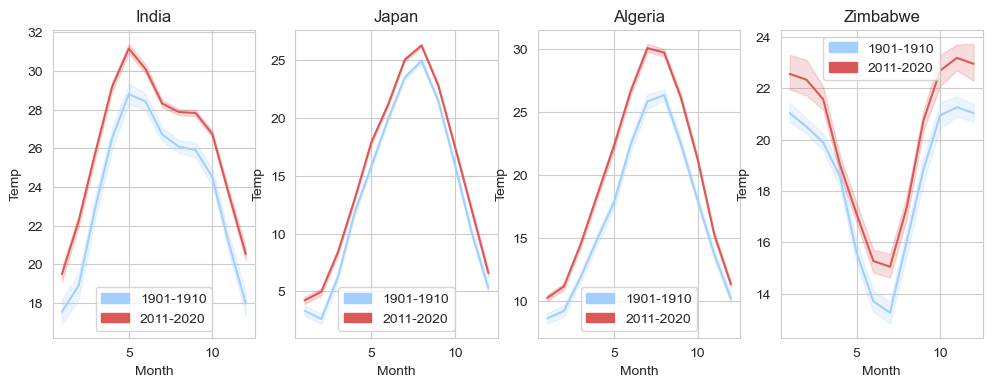

In [29]:
def plot_average_temperatures_line(countries, monthstart, monthend):
    """
    Plots the average temperatures for the given countries over certain months and creates a lineplot for each country
    
    Parameters:
    - countries (list): A list of country names.
    - monthstart (int) : The month you want the lineplot to start
    - monthend (int) : The month you want the lineplot to end.
    """
    monthspan = []
    for i in range(monthstart, monthend+1):
        monthspan.append(i)

    fig, axes = plt.subplots(1, ncols= len(countries), figsize=(12,4))
    axes = axes.flatten()

    for i, country in enumerate(countries):
        data1 = pd.DataFrame()
        data2 = pd.DataFrame()
        for j, month in enumerate(monthspan):
            data1 = pd.concat([data1, query_climate(df, country, 1901, 1910, month)])
            data2 = pd.concat([data2, query_climate(df, country, 2011, 2020, month)])
        sns.lineplot(x = 'Month', y = 'Temp', data = data1, color = '#a2cffe', ax=axes[i]).set_title(f'{country}')
        sns.lineplot(x = 'Month', y = 'Temp', data = data2, color = '#db5856', ax=axes[i]).set_title(f'{country}')
        
        # Create custom patches
        patch1 = mpatches.Patch(color='#a2cffe', label='1901-1910')
        patch2 = mpatches.Patch(color='#db5856', label='2011-2020')
        
        # Add the patches to the legend
        axes[i].legend(handles=[patch1, patch2])
        
    
    plt.show()

countries = ['India', 'Japan', 'Algeria', 'Zimbabwe']
plot_average_temperatures_line(countries, 1, 12)

This function plot_average_temperatures_line does essentially the same thing as part 4, however it takes an argument which determines the start month you want for the lineplot and the end month. It also takes the countries you want to plot and plots a different lineplot for each country. Again we can compare the two different decades by doing so and we see the same trend as the barplot.
There is an apparent difference in the two decades with the temperatures getting progressively hotter.

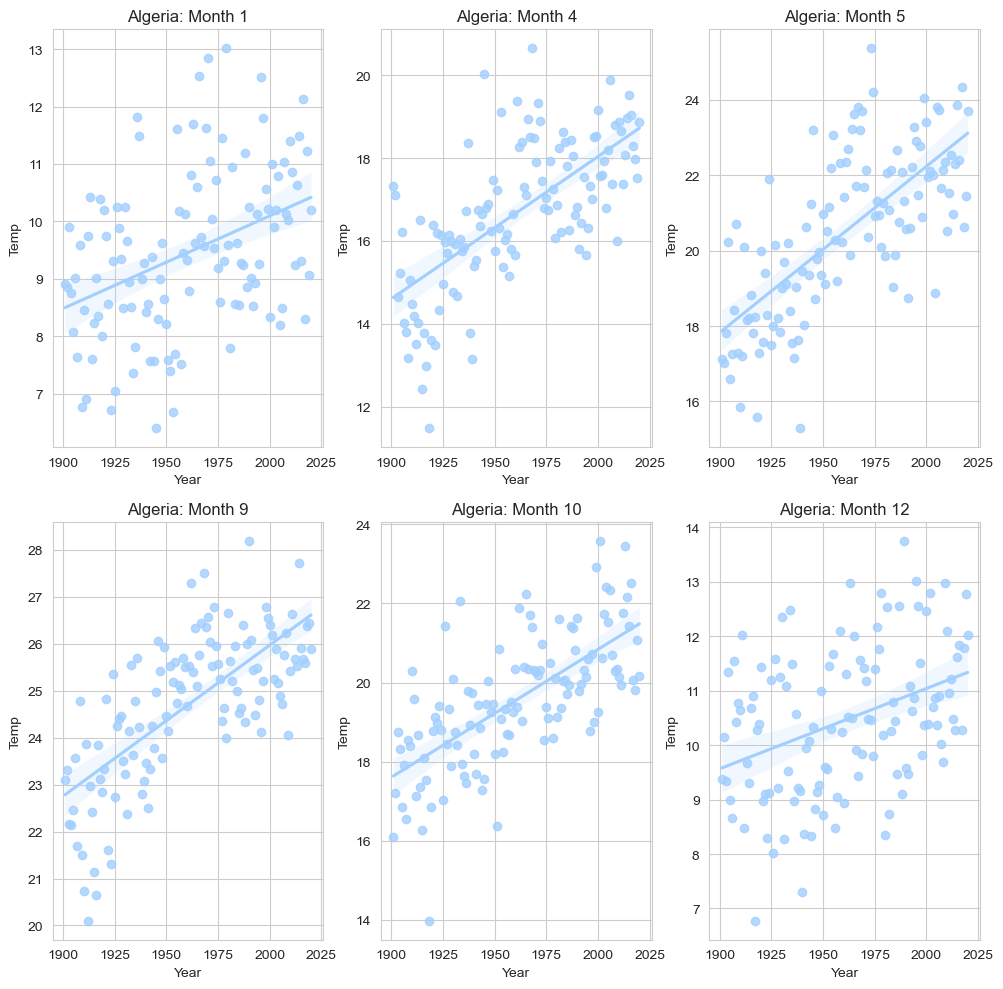

In [31]:
# For this plot I wanted to visualize the rate of change in the average temperature over the years.
url1 = 'https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/2001-2010.csv'
df3 = pd.read_csv('https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/1911-1920.csv')
df4 = pd.read_csv('https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/1921-1930.csv')
df5 = pd.read_csv('https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/1931-1940.csv')
df6 = pd.read_csv('https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/1941-1950.csv')
df7 = pd.read_csv('https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/1951-1960.csv')
df8 = pd.read_csv('https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/1961-1970.csv')
df9 = pd.read_csv('https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/1971-1980.csv')
df10 = pd.read_csv('https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/1981-1990.csv')
df11 = pd.read_csv('https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/1991-2000.csv')
df12 = pd.read_csv(url1)                                                

dfall = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12])

dfall["FIPS 10-4"] = dfall["ID"].str[0:2]
dfall = pd.merge(dfall, countriesdf, on = ['FIPS 10-4'], how='left')
dfall = dfall.merge(stations, on='ID')
dfall = dfall.set_index(keys = ['ID', 'Year', 'Name', 'LATITUDE', 'LONGITUDE', 'NAME'])
dfall = dfall.drop(["FIPS 10-4", "ISO 3166", 'STNELEV'], axis = 1)
dfall = dfall.stack().reset_index()
dfall = dfall.rename(columns = {'level_6': 'Month', 0: 'Temperature (C)', 'NAME' : 'Station Name'})
dfall['Month'] = dfall['Month'].str[5:].astype(int)
dfall['Temperature'] = dfall['Temperature (C)'] / 100
dfall



def plot_average_temperatures_scatter(countries, months, yearstart, yearend):
    """
    Plots the average temperatures for a given country over years. The plots refer to the months given and it also asks for the range of years.
    Takes in 6 different months.
    Plots a regression scatter plot
    Parameters:
    - countries (string): A country name.
    - months (list): A list of month numbers.
    - yearstart (int) - The starting year of the date range.
    - yearend (int) - The ending year of the date range.
    """
    
    fig, axes = plt.subplots(2, 3, figsize=(10, 5*2))
    axes = axes.flatten()
    for i, month in enumerate(months):
        data1 = pd.DataFrame()
        data1 = pd.concat([data1, query_climate(dfall, countries, yearstart, yearend, month)])
        data1 = data1.groupby('Year')['Temp'].mean().reset_index()
        sns.regplot(x = 'Year', y = 'Temp', data = data1, color = '#a2cffe', ax=axes[i]).set_title(f'{countries}: Month {month}')
        
        
    plt.tight_layout()
    plt.show()
plot_average_temperatures_scatter('Algeria', months, 1901, 2020)

In this plot I imported all of the decades on professor's github page. With this new dataframe containing all the years, I averaged each station's temperature from the same year and then plotted them against time. With this plot I formed a regression line.
The regression line shows an increase in average temperature throughout the years through all the months of the year over a given country.
With this information it just further backs the claim that temperatures are rising throughout the years on average.

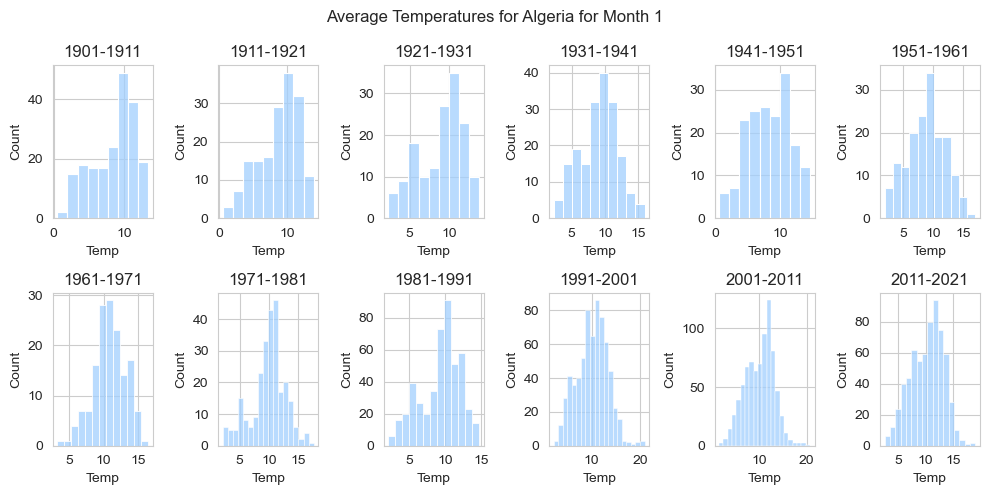

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

'''
this function plots the count of temperatures for the given country for the given month.
The function plots a histogram for each decade.
Parameters:
countries (string): A country name.
month (int): A month number.
'''
def plot_average_temperatures_hist(countries, month):
    fig, axes = plt.subplots(2, 6, figsize=(10, 5))
    axes = axes.flatten()
    plt.suptitle(f'Average Temperatures for {countries} for Month {month}')
    for i, year in enumerate(range(1901, 2021, 10)):
        data1 = pd.DataFrame()
        data1 = query_climate(dfall, countries, year, (year+10), month)
        ax = axes[i]
        sns.histplot(data1['Temp'], color = '#a2cffe', ax=ax).set_title(f'{year}-{year+10}')
    plt.tight_layout()
    plt.show()

plot_average_temperatures_hist('Algeria', 1)




to make this I utilized the full dataset I created in the regressionplot code. To make the function I interated over decades plotting a plot for each decade in the dataframe.
From this data we can see two things. Firstly it is obvious that throughout the years the number of stations and recording data increased as the total count is way greater than the early decades. In terms of temperatures as we move up the decades there are greater outliers in the count of temperatures. The number of high temperatures increased showing a correlation of warming temperatures and time. 

## Publish (5 pts)

Publish your work on github: Create a repository called HW in your github account, then upload your jupyter notebook. You should create a readme.md file to describe this repository. Please include the link in this cell

https://github.com/ericchiedu/HW